In [ ]:
import numpy as np
from trigger_study.wk9.sum.OptimumFilter import *
from trigger_study.wk9.sum.trace_IO import *
import matplotlib.pyplot as plt
from scipy.stats import describe

sampling_frequency = 3906250  # Hz
noise_psd = np.load("../../templates/noise_psd_from_MMC.npy")
sum_psd = 9*noise_psd
template = np.load("sum_qp_template_1800.npy")
sum_of = OptimumFilter(template, sum_psd, sampling_frequency)


In [20]:
quantized_trace = load_traces_from_zstd("/ceph/dwong/mmc_noise_quantized.zst", n_traces=100)
not_quantized_trace = load_traces_from_zstd("/ceph/dwong/mmc_noise_not_quantized.zst", n_traces=100)


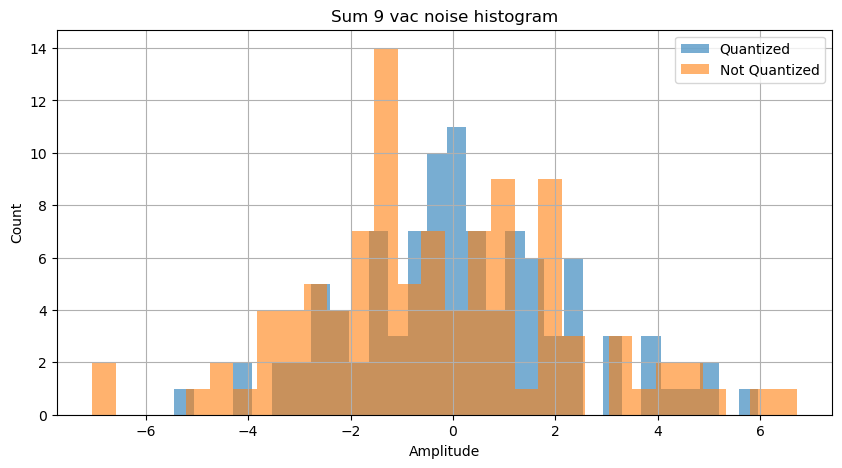

--- Quantized Amplitudes ---
Mean      : 0.1867
Std Dev   : 2.1476
Min       : -5.4423
Max       : 5.9658

--- Not Quantized Amplitudes ---
Mean      : -0.3393
Std Dev   : 2.5799
Min       : -7.0456
Max       : 6.7193



In [21]:
def process_trace_set(trace_set):
    amplitudes = []
    chisqs = []
    
    for i in range(trace_set.shape[0]):
        summed_trace = np.sum(trace_set[i, 45:, :], axis=0)  # Sum channels 45 to 53
        ampl, chisq = sum_of.fit(summed_trace)
        amplitudes.append(ampl)
        chisqs.append(chisq)
    
    return np.array(amplitudes), np.array(chisqs)

# Process both datasets
ampl_q, chisq_q = process_trace_set(quantized_trace)
ampl_nq, chisq_nq = process_trace_set(not_quantized_trace)

# Plot histogram of amplitudes
plt.figure(figsize=(10, 5))
plt.hist(ampl_q, bins=30, alpha=0.6, label='Quantized')
plt.hist(ampl_nq, bins=30, alpha=0.6, label='Not Quantized')
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.title("Sum 9 vac noise histogram")
plt.legend()
plt.grid(True)
plt.show()

# Print statistics
def print_stats(name, data):
    stats = describe(data)
    print(f"--- {name} ---")
    print(f"Mean      : {stats.mean:.4f}")
    print(f"Std Dev   : {np.sqrt(stats.variance):.4f}")
    print(f"Min       : {stats.minmax[0]:.4f}")
    print(f"Max       : {stats.minmax[1]:.4f}")
    print()

print_stats("Quantized Amplitudes", ampl_q)
print_stats("Not Quantized Amplitudes", ampl_nq)